# MNIST fashion data set

## Loading the MNIST fashion data set

In [3]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Exploring the format of the MNIST fashion data set

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_images)

60000

In [6]:
train_images.ndim

3

In [7]:
train_images.dtype

dtype('uint8')

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
len(train_labels)

60000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Displaying some MNIST fashion items

In [0]:
import matplotlib.pyplot as plt
import numpy as np

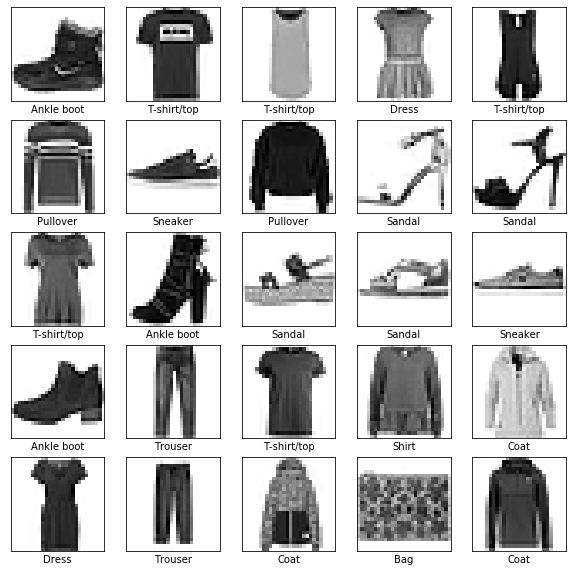

In [12]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

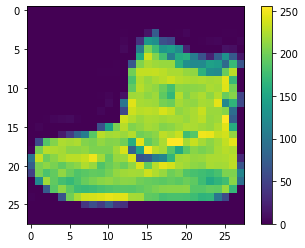

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build the underfitting model

In [18]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(3, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 119us/sample - loss: 1.8895 - acc: 0.2311 - val_loss: 1.6798 - val_acc: 0.2857
Epoch 2/20
60000/60000 [==============================] - 7s 116us/sample - loss: 1.6008 - acc: 0.3082 - val_loss: 1.5490 - val_acc: 0.3393
Epoch 3/20
60000/60000 [==============================] - 7s 114us/sample - loss: 1.5145 - acc: 0.3375 - val_loss: 1.4889 - val_acc: 0.3555
Epoch 4/20
60000/60000 [==============================] - 7s 112us/sample - loss: 1.4556 - acc: 0.3734 - val_loss: 1.4258 - val_acc: 0.3956
Epoch 5/20
60000/60000 [==============================] - 7s 113us/sample - loss: 1.3969 - acc: 0.4128 - val_loss: 1.3804 - val_acc: 0.4119
Epoch 6/20
60000/60000 [==============================] - 7s 113us/sample - loss: 1.3608 - acc: 0.4269 - val_loss: 1.3517 - val_acc: 0.4306
Epoch 7/20
60000/60000 [==============================] - 7s 121us/sample - loss: 1.3371 - acc: 0.4345 - val_l

## Evaluate underfitting accuracy

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 70us/sample - loss: 1.1489 - acc: 0.5289
Test accuracy: 0.5289


The low accuracy rate on both the training and test is an example of underfitting because the model is too simple to understand the data.





##Build the overfitting model

In [26]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 120us/sample - loss: 0.4931 - acc: 0.8269 - val_loss: 0.4062 - val_acc: 0.8555
Epoch 2/20
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3689 - acc: 0.8661 - val_loss: 0.3916 - val_acc: 0.8578
Epoch 3/20
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3287 - acc: 0.8788 - val_loss: 0.3717 - val_acc: 0.8654
Epoch 4/20
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3044 - acc: 0.8877 - val_loss: 0.3517 - val_acc: 0.8725
Epoch 5/20
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2873 - acc: 0.8928 - val_loss: 0.3764 - val_acc: 0.8608
Epoch 6/20
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2726 - acc: 0.8985 - val_loss: 0.3382 - val_acc: 0.8789
Epoch 7/20
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2600 - acc: 0.9029 - val_l

##Evalute the overfitting accuracy

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 65us/sample - loss: 0.3582 - acc: 0.8896
Test accuracy: 0.8896


The difference between the training and the test accuracy means that the model was trained to much on the training set making it notice details that would not transfer over to a brand new data set, meaning that the model is overfitting.

##Build a good fitting model

In [25]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax),
    keras.layers.Dropout(.08)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 86us/sample - loss: 1.3702 - acc: 0.7568 - val_loss: 0.5734 - val_acc: 0.8270
Epoch 2/20
60000/60000 [==============================] - 5s 79us/sample - loss: 1.1372 - acc: 0.7931 - val_loss: 0.6127 - val_acc: 0.8367
Epoch 3/20
60000/60000 [==============================] - 5s 83us/sample - loss: 1.0582 - acc: 0.8029 - val_loss: 0.4831 - val_acc: 0.8613
Epoch 4/20
60000/60000 [==============================] - 5s 85us/sample - loss: 1.0065 - acc: 0.8084 - val_loss: 0.5109 - val_acc: 0.8672
Epoch 5/20
60000/60000 [==============================] - 5s 85us/sample - loss: 0.9806 - acc: 0.8131 - val_loss: 0.5237 - val_acc: 0.8656
Epoch 6/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.9283 - acc: 0.8213 - val_loss: 0.5481 - val_acc: 0.8551
Epoch 7/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.8976 - acc: 0.8235 - val_loss: 0.

##Evalute the good model accuracy

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.5774 - acc: 0.8696
Test accuracy: 0.8696


This an example of a good model because their is an acceptable value for the validation accuracy while it not being higher than the training accuracy so it means that on new data the model can predict reliably.

## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

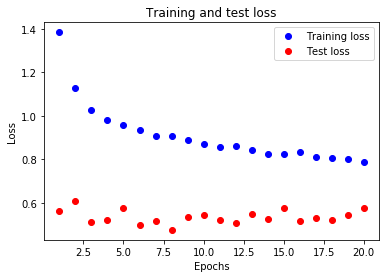

In [21]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

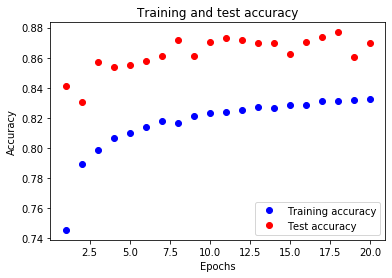

In [23]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Make predictions

In [0]:
predictions = model.predict(test_images)

In [0]:
index = 0
predictions[index]

array([3.0819329e-22, 4.4014819e-22, 1.1447663e-22, 2.4015319e-21,
       5.0046199e-25, 6.6126660e-10, 2.3183376e-23, 3.5624268e-07,
       3.9516316e-18, 9.9999964e-01], dtype=float32)

In [0]:
np.argmax(predictions[index])

9

In [0]:
test_labels[index]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

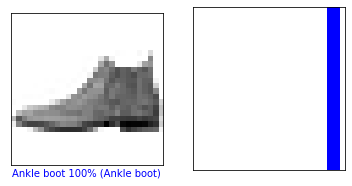

In [0]:
index = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(index, predictions,  test_labels)


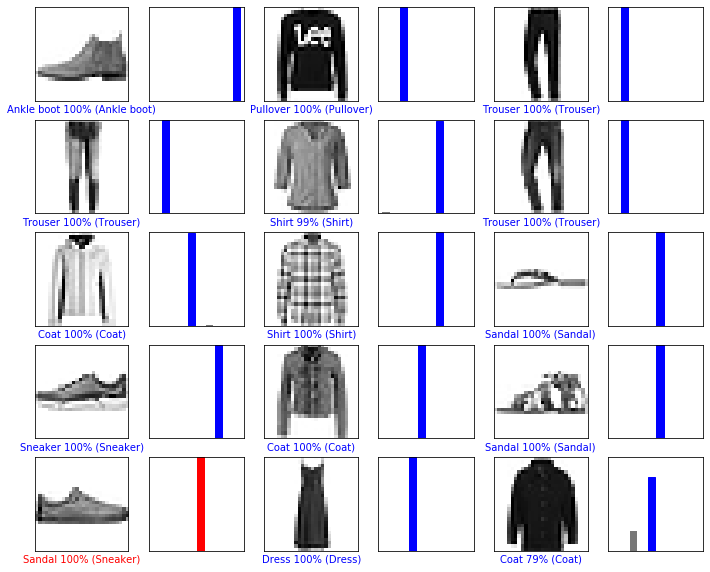

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


## Make prediction about a single image

In [0]:
index = 0
test_image = test_images[index]
print(test_image.shape)

(28, 28)


In [0]:
# Add the image to a batch where it's the only member
test_image_single = (np.expand_dims(test_image, 0))
print(test_image_single.shape)

(1, 28, 28)


In [0]:
predictions_single = model.predict(test_image_single)
print(predictions_single)

[[4.9233274e-04 1.8322915e-08 1.8716388e-04 7.6582701e-06 4.8123940e-05
  2.0060557e-01 6.5409119e-04 3.7881863e-01 2.1375332e-02 3.9781108e-01]]


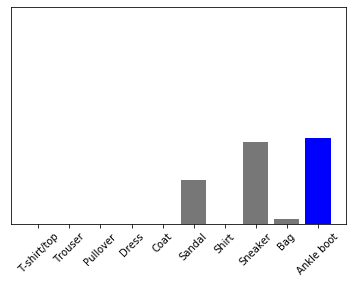

In [0]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

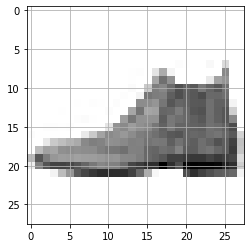

In [0]:
plt.imshow(test_image, cmap=plt.cm.binary)
plt.grid(None)

In [0]:
np.argmax(predictions_single[0])

9

In [0]:
test_labels[index]

9